In [1]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://pyramid-arima.readthedocs.io/en/latest/_submodules/arima.html
import numpy
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima

Using TensorFlow backend.


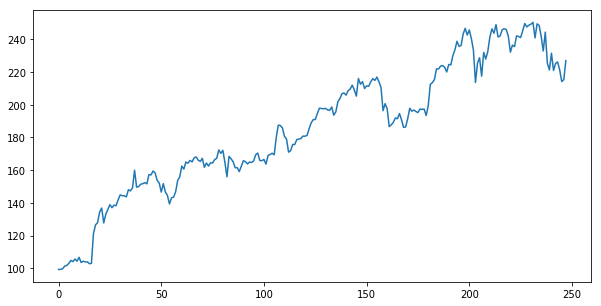

In [2]:
dataset = pandas.read_csv('NVDA.csv', usecols=[1], engine='python', skipfooter=3)
dataset = numpy.flipud(dataset)[1::]
plt.figure(figsize=(10,5))
plt.plot(dataset)
plt.show()
#dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

166 82


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX.shape

(150, 15)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX.shape

(150, 1, 15)

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0954
Epoch 2/200
 - 0s - loss: 0.0598
Epoch 3/200
 - 0s - loss: 0.0595
Epoch 4/200
 - 0s - loss: 0.0587
Epoch 5/200
 - 0s - loss: 0.0541
Epoch 6/200
 - 0s - loss: 0.0513
Epoch 7/200
 - 0s - loss: 0.0451
Epoch 8/200
 - 0s - loss: 0.0515
Epoch 9/200
 - 0s - loss: 0.0564
Epoch 10/200
 - 0s - loss: 0.0512
Epoch 11/200
 - 0s - loss: 0.0437
Epoch 12/200
 - 0s - loss: 0.0466
Epoch 13/200
 - 0s - loss: 0.0500
Epoch 14/200
 - 0s - loss: 0.0451
Epoch 15/200
 - 0s - loss: 0.0487
Epoch 16/200
 - 0s - loss: 0.0453
Epoch 17/200
 - 0s - loss: 0.0458
Epoch 18/200
 - 0s - loss: 0.0454
Epoch 19/200
 - 0s - loss: 0.0438
Epoch 20/200
 - 0s - loss: 0.0433
Epoch 21/200
 - 0s - loss: 0.0422
Epoch 22/200
 - 0s - loss: 0.0407
Epoch 23/200
 - 0s - loss: 0.0442
Epoch 24/200
 - 0s - loss: 0.0402
Epoch 25/200
 - 0s - loss: 0.0460
Epoch 26/200
 - 0s - loss: 0.0395
Epoch 27/200
 - 0s - loss: 0.0393
Epoch 28/200
 - 0s - loss: 0.0395
Epoch 29/200
 - 0s - loss: 0.0426
Epoch 30/200
 - 0s - lo

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.46 RMSE
Test Score: 6.28 RMSE


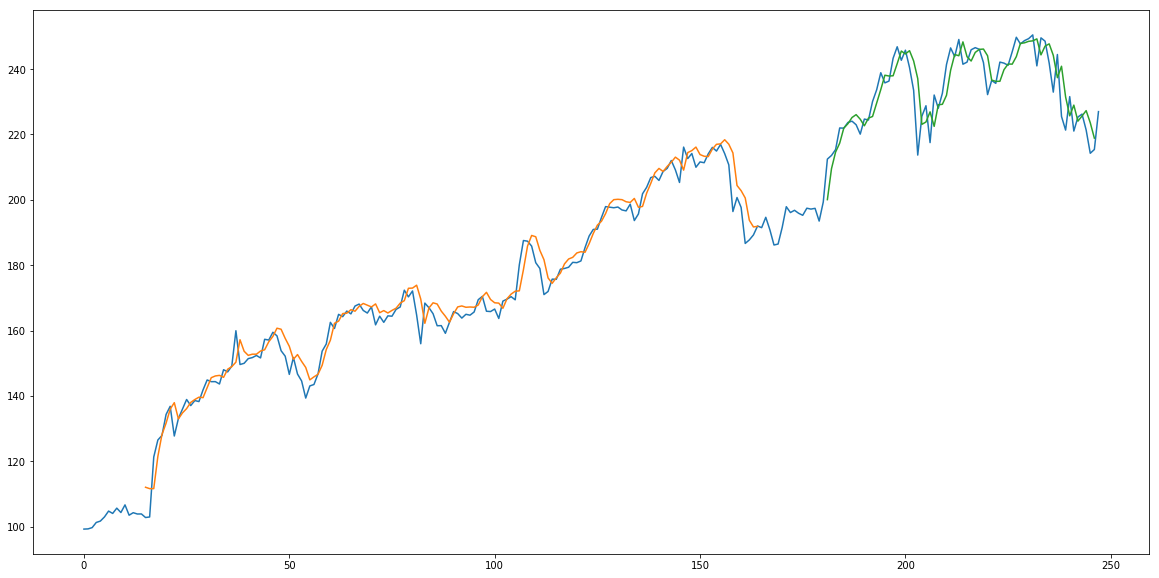

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
train2 = dataset
trainX2, trainY2 = create_dataset(train2, look_back)
trainX2 = numpy.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
trainX2.shape, trainY2.shape

((232, 1, 15), (232,))

In [ ]:
model2 = Sequential()
model2.add(LSTM(64, input_shape=(1, look_back)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.compile(loss='mean_absolute_error', optimizer='adam')
model2.fit(trainX2, trainY2, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0993
Epoch 2/200
 - 1s - loss: 0.0689
Epoch 3/200
 - 1s - loss: 0.0732
Epoch 4/200
 - 1s - loss: 0.0737
Epoch 5/200
 - 1s - loss: 0.0645
Epoch 6/200
 - 1s - loss: 0.0702
Epoch 7/200
 - 1s - loss: 0.0616
Epoch 8/200
 - 1s - loss: 0.0703
Epoch 9/200
 - 1s - loss: 0.0615
Epoch 10/200
 - 1s - loss: 0.0561
Epoch 11/200
 - 1s - loss: 0.0603
Epoch 12/200
 - 1s - loss: 0.0621
Epoch 13/200
 - 1s - loss: 0.0568
Epoch 14/200
 - 0s - loss: 0.0540
Epoch 15/200
 - 0s - loss: 0.0547
Epoch 16/200
 - 0s - loss: 0.0510
Epoch 17/200
 - 0s - loss: 0.0546
Epoch 18/200
 - 0s - loss: 0.0513
Epoch 19/200
 - 0s - loss: 0.0558
Epoch 20/200
 - 0s - loss: 0.0562
Epoch 21/200
 - 0s - loss: 0.0550
Epoch 22/200
 - 0s - loss: 0.0545
Epoch 23/200
 - 0s - loss: 0.0442
Epoch 24/200
 - 0s - loss: 0.0481
Epoch 25/200
 - 0s - loss: 0.0492
Epoch 26/200
 - 0s - loss: 0.0523
Epoch 27/200
 - 0s - loss: 0.0491
Epoch 28/200
 - 1s - loss: 0.0511
Epoch 29/200
 - 1s - loss: 0.0463
Epoch 30/200
 - 1s - lo

In [ ]:
# make predictions
trainPredict2 = model2.predict(trainX2)
# invert predictions
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
# calculate root mean squared error
trainScore2 = math.sqrt(mean_squared_error(trainY2, trainPredict2.T))
print('Train Score2: %.2f RMSE' % (trainScore2))

In [ ]:
trainY2.shape, trainPredict2.shape

In [ ]:
# shift train predictions for plotting
trainPredictPlot2 = numpy.empty_like(dataset)
trainPredictPlot2[:, :] = numpy.nan
trainPredictPlot2[look_back:len(trainPredict2)+look_back, :] = trainPredict2

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot2)
plt.show()

In [ ]:
import pandas as pd
#from plotly.plotly import plot_mpl
#from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#trainPredict2 = pd.DataFrame(trainPredict2)
#result = seasonal_decompose(trainPredict2, model='multiplicative')
#fig = result.plot()
#plot_mpl(fig)

In [ ]:
numpy.savetxt("LSTM_Predicted.csv", trainPredict2, delimiter=",")

In [ ]:
stepwise_model = auto_arima(trainPredict2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [ ]:
print(stepwise_model.aic())

In [ ]:
n_periods = 15
future_forecast = stepwise_model.predict(n_periods=n_periods)
print(future_forecast)
trainPredict2full = numpy.append(trainPredict2,future_forecast)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(trainPredict2)
plt.plot(trainPredict2full, '--')
plt.show()